<a href="https://colab.research.google.com/github/LeyloJohnny/Computational-Neuroscience/blob/main/Cluster_average_HMM_states.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HMM Analysis

### Access and understand data

Get data files:

In [1]:
#get data from google drive
!gdown --id 1qblO7uQCJ6KKclqS-rhvXfQ7ccWcmxaA
#unzip data
!unzip 'NewData.zip'

Downloading...
From: https://drive.google.com/uc?id=1qblO7uQCJ6KKclqS-rhvXfQ7ccWcmxaA
To: /content/NewData.zip
127MB [00:01, 114MB/s] 
Archive:  NewData.zip
  inflating: Cluster.pkl             
  inflating: BN.pkl                  
  inflating: SFA.pkl                 


Get a list of data for all three models:

In [2]:
import pickle

#create a list of model name strings
models = ['BN.pkl', "SFA.pkl", "Cluster.pkl"]

#create a list of model names
model_names = ["Balanced Network", "Clustered with SFA", "Clustered wo SFA"]

#create lists to store model data
models_x = []
models_y = []

#for all models
for i in range(len(models)):

  #open pickle file
  with open(models[i], 'rb') as f:
    #get x (actual data: time * neuron id)
    x = pickle.load(f)
    #get y (information on data, such as inhibitory/excitatory neurons, clusters, etc.)
    y = pickle.load(f)
    #add x and y to the models lists
    models_x.append(x)
    models_y.append(y)

###Extract certain time range

In [37]:
import numpy as np
import pandas as pd

time_range_models = []

time_range = 100000

for model in range(len(models)):
  #set condition: returns True for time <= 5 s
  condition = [True if i <= time_range else False for i in models_x[model][0]]

  #extract new x and y values for array based on condition
  new_x = np.extract(condition, models_x[model][0])
  new_y = np.extract(condition, models_x[model][1])

  new = [new_x, new_y]

  time_range_models.append(new)

### Create raster plots from data for one cluster

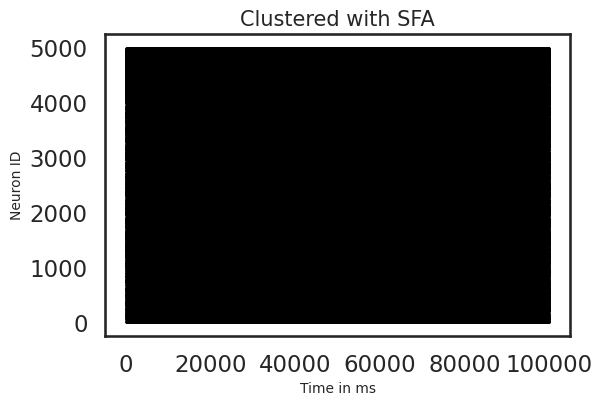

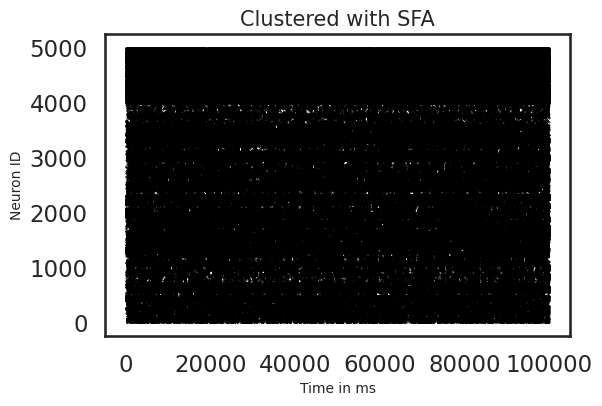

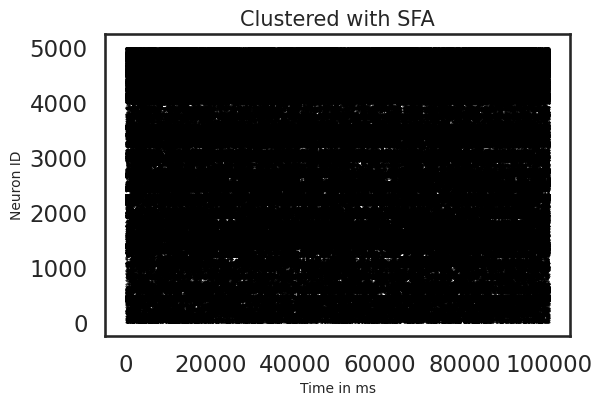

In [38]:
import matplotlib.pyplot as plt

one_cluster = []

neuron_ID = 0

for model in range(len(models)):

  condition = [True if i > neuron_ID and i <= neuron_ID+5000 else False for i in time_range_models[model][1]]

  #extract new x and y values for array based on condition
  new_x = np.extract(condition, time_range_models[model][0])
  new_y = np.extract(condition, time_range_models[model][1])

  #create figure
  figure = plt.figure(dpi=100)
  #create subplot
  ax = figure.add_subplot(1,1,1)
  #plot both dimensions of x (time, neuron id)
  plt.plot(new_x,new_y,'.k',markersize = 0.8) 

  #label the plot
  ax.set_xlabel('Time in ms', fontsize = 10)
  ax.set_ylabel('Neuron ID', fontsize = 10)
  ax.set_title(model_names[i], fontsize = 15)

  new = [new_x, new_y]

  one_cluster.append(new)

### Create spike count matrix

In [39]:
neurons = [51, 52, 53, 
           151, 156, 157, 
           171, 173, 185, 
           250, 251, 317, 
           331, 360, 390, 
           402, 404, 407, 
           540, 541, 550, 
           590, 609, 621, 
           651, 655, 692,
           737, 755, 784,
           809, 812, 851,
           891, 930, 950,
           963, 1001, 1018,
           1041, 1059, 1081,
           1122, 1131, 1170, 
           1211, 1273, 1278,
           1287, 1290, 1328,
           1361, 1380, 1390, 
           1479, 1490, 1519,
           1567, 1574, 1581,
           1648, 1649, 1650,
           1751, 1752, 1753,
           1837, 1838, 1839, 
           1871, 1872, 1873,
           1996, 1997, 1998,
           2027, 2028, 2029,
           2084, 2088, 2094,
           2228, 2229, 2230, 
           2317, 2318, 2319, 
           2354, 2355, 2377,
           2461, 2462, 2463,
           2532, 2533, 2535, 
           2625, 2627, 2628,
           2659, 2670, 2667, 
           2725, 2736, 2773, 
           2814, 2816, 2858, 
           2910, 2912, 2914, 
           3035, 3036, 3037,
           3116, 3117, 3118, 
           3164, 3165, 3166, 
           3263, 3264, 3267, 
           3299, 3300, 3301,
           3416, 3417, 3418,
           3485, 3487, 3490, 
           3522, 3523, 3524, 
           3641, 3651, 3657, 
           3688, 3694, 3740,
           3766, 3782, 3802,
           3882, 3887, 3995, 
           3932, 3934, 3949]

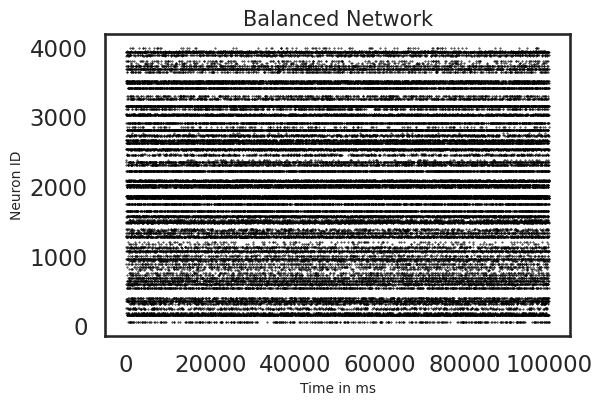

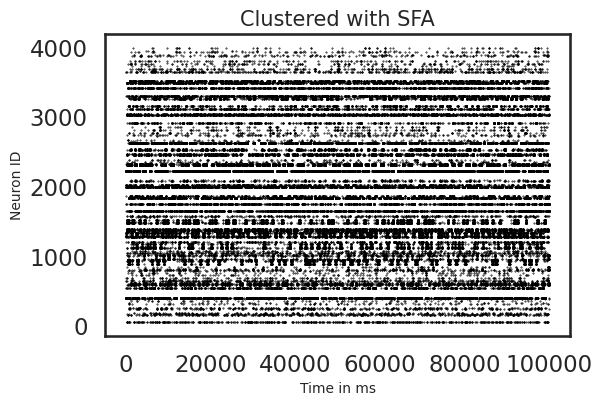

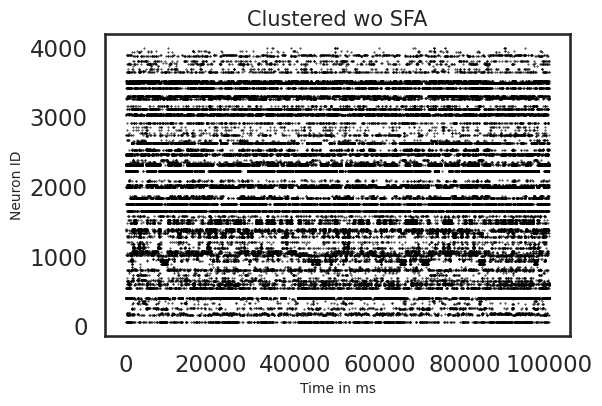

In [40]:
import matplotlib.pyplot as plt

three_neurons_per_cluster = []

for model in range(len(models)):

  condition = [True if i in neurons else False for i in time_range_models[model][1]]

  #extract new x and y values for array based on condition
  new_x = np.extract(condition, time_range_models[model][0])
  new_y = np.extract(condition, time_range_models[model][1])

  #create figure
  figure = plt.figure(dpi=100)
  #create subplot
  ax = figure.add_subplot(1,1,1)
  #plot both dimensions of x (time, neuron id)
  plt.plot(new_x, new_y, '.k',markersize = 0.8) 

  #label the plot
  ax.set_xlabel('Time in ms', fontsize = 10)
  ax.set_ylabel('Neuron ID', fontsize = 10)
  ax.set_title(model_names[model], fontsize = 15)

  new = [new_x, new_y]
  new_array = np.array(new)

  three_neurons_per_cluster.append(new_array)

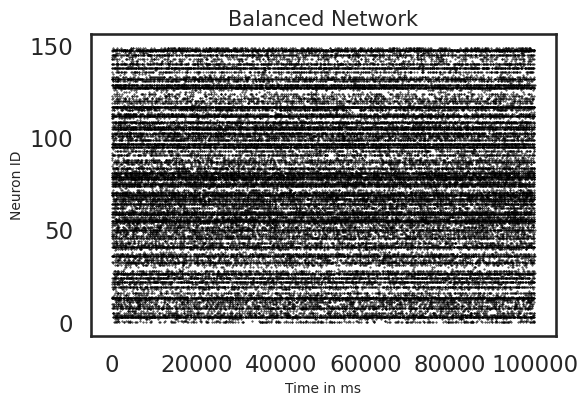

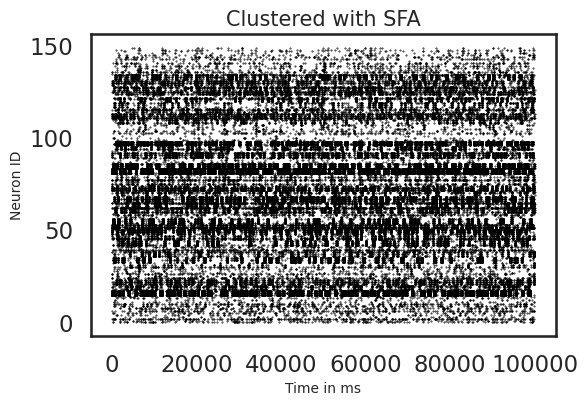

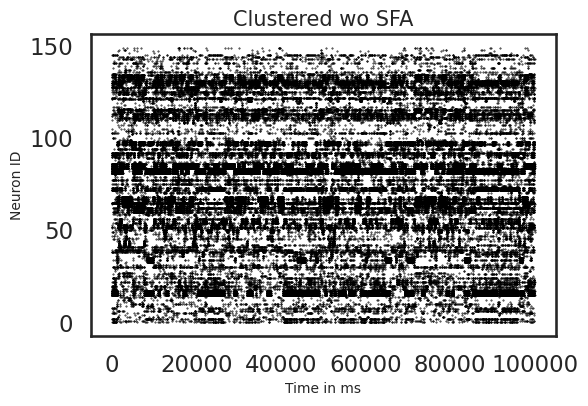

In [41]:
new_neuron_IDs = range(150)

for model in range(len(models)):

  for neuron in range(len(neurons)):

    three_neurons_per_cluster[model][np.where(three_neurons_per_cluster[model] == neurons[neuron])] = new_neuron_IDs[neuron]

  #create figure
  figure = plt.figure(dpi=100)
  #create subplot
  ax = figure.add_subplot(1,1,1)
  #plot both dimensions of x (time, neuron id)
  plt.plot(three_neurons_per_cluster[model][0], three_neurons_per_cluster[model][1], '.k',markersize = 0.8) 

  #label the plot
  ax.set_xlabel('Time in ms', fontsize = 10)
  ax.set_ylabel('Neuron ID', fontsize = 10)
  ax.set_title(model_names[model], fontsize = 15)

In [42]:
import numpy as np

#define a time window (in milliseconds)
window = 50

file_name = "spike_count_matrix_tr_" + str(time_range) + "_tw_" + str(window)

#calculate number of intervals based on recorded time span / time window
intervals = int(np.max(three_neurons_per_cluster[i][0]+ 1)/window)

#how many intervals do we have?
print("We have " + str(intervals) + " intervals, each " + str(window) + "ms long. \n")

spike_count_matrix = np.zeros((len(models), intervals, len(neurons)))

#for every model
for i in range(len(models)):
  #get the data of the current model
  current_model_x = np.array(three_neurons_per_cluster[i])

  #create a zeros array with size time * neurons (5000*4000)
  spike_counts = np.zeros((intervals, len(neurons)))

  #for every interval
  for j in range(intervals):

    #get the indices of time points within the current interval
    interval_time_points = np.where(np.logical_and(window*j <= current_model_x[0], current_model_x[0] < window*(j+1)))

    #get data indexed by current interval
    interval_data = current_model_x[1][interval_time_points]
    
    #for every neuron
    for k in range(len(neurons)):

        #get the indices of the current neuron within the defined time interval
        current_neuron = np.where(interval_data == new_neuron_IDs[k])

        #get the number of spikes based on the amount of neuron indices within the defined time interval
        spikes = current_neuron[0].shape[0]

        #add spikes number to spike count matrix
        spike_counts[j, k] = spikes
  
  #add spike count matrix for every model
  spike_count_matrix[i] = spike_counts

np.save(file_name, spike_count_matrix)

#print data
print("The spike count matrix has the shape: " + str(spike_count_matrix.shape) + " representing " + 
      str(spike_count_matrix.shape[0]) + " models, " + str(spike_count_matrix.shape[1]) + " intervals, and " + str(spike_count_matrix.shape[2]) + " neurons. \n")
print("Spike count matrix: \n")
print(spike_count_matrix)

We have 2000 intervals, each 50ms long. 

The spike count matrix has the shape: (3, 2000, 150) representing 3 models, 2000 intervals, and 150 neurons. 

Spike count matrix: 

[[[0. 0. 0. ... 1. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 1. 0.]
  [0. 1. 0. ... 0. 1. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [1. 0. 2. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [43]:
#define titles for columns and rows in the dataframe that will be generated from the spike count matrix
cols = ['Neuron{}'.format(int(col+1)) for col in range(len(neurons))] #rows represent the neurons (= features)
rows = ['Interval{}'.format(int(row+1)) for row in range(intervals)] #columns represent the time intervals/time bins (= samples)

#create list for the data to be analyzed for each model
models_data = []

#for every model
for i in range(len(models)):
  #create a dataframe from the spike count matrix
  current = spike_count_matrix[i]
  data = pd.DataFrame(data = current, index = rows, columns = cols)
  #add the dataframe to the list (containing one dataframe per model)
  models_data.append(data)

#exemplarily show the dataframe for the second model
models_data[2].head(intervals)

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,Neuron11,Neuron12,Neuron13,Neuron14,Neuron15,Neuron16,Neuron17,Neuron18,Neuron19,Neuron20,Neuron21,Neuron22,Neuron23,Neuron24,Neuron25,Neuron26,Neuron27,Neuron28,Neuron29,Neuron30,Neuron31,Neuron32,Neuron33,Neuron34,Neuron35,Neuron36,Neuron37,Neuron38,Neuron39,Neuron40,...,Neuron111,Neuron112,Neuron113,Neuron114,Neuron115,Neuron116,Neuron117,Neuron118,Neuron119,Neuron120,Neuron121,Neuron122,Neuron123,Neuron124,Neuron125,Neuron126,Neuron127,Neuron128,Neuron129,Neuron130,Neuron131,Neuron132,Neuron133,Neuron134,Neuron135,Neuron136,Neuron137,Neuron138,Neuron139,Neuron140,Neuron141,Neuron142,Neuron143,Neuron144,Neuron145,Neuron146,Neuron147,Neuron148,Neuron149,Neuron150
Interval1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval2,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Interval5,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,5.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Interval1996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval1998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval1999,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,6.0,0.0,0.0,0.0,5.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.

###Spike count matrix with cluster average:

In [44]:
import numpy as np

#define a time window (in milliseconds)
window = 50

file_name = "spike_count_matrix_tr_" + str(time_range) + "_tw_" + str(window)

#calculate number of intervals based on recorded time span / time window
intervals = int(np.max(time_range_models[i][0]+ 1)/window)

#define which neurons to focus on (here: only excitatory neurons 0 - 4000)
Nneurons = int(np.max(time_range_models[i][1])+1) - 1000

#how many intervals do we have?
print("We have " + str(intervals) + " intervals, each " + str(window) + "ms long. \n")

spike_count_matrix_average = np.zeros((len(models), intervals, Nneurons))

#for every model
for i in range(len(models)):
  #get the data of the current model
  current_model_x = np.array(time_range_models[i])

  #create a zeros array with size time * neurons (5000*4000)
  spike_counts = np.zeros((intervals, Nneurons))

  #for every interval
  for j in range(intervals):

    #get the indices of time points within the current interval
    interval_time_points = np.where(np.logical_and(window*j <= current_model_x[0], current_model_x[0] < window*(j+1)))

    #get data indexed by current interval
    interval_data = current_model_x[1][interval_time_points]
    
    #for every neuron
    for k in range(Nneurons):

        #get the indices of the current neuron within the defined time interval
        current_neuron = np.where(interval_data == k)

        #get the number of spikes based on the amount of neuron indices within the defined time interval
        spikes = current_neuron[0].shape[0]

        #add spikes number to spike count matrix
        spike_counts[j, k] = spikes
  
  #add spike count matrix for every model
  spike_count_matrix_average[i] = spike_counts

#print data
print("The spike count matrix has the shape: " + str(spike_count_matrix_average.shape) + " representing " + 
      str(spike_count_matrix_average.shape[0]) + " models, " + str(spike_count_matrix_average.shape[1]) + " intervals, and " + str(spike_count_matrix_average.shape[2]) + " neurons. \n")
print("Spike count matrix: \n")
print(spike_count_matrix_average)

We have 2000 intervals, each 50ms long. 

The spike count matrix has the shape: (3, 2000, 4000) representing 3 models, 2000 intervals, and 4000 neurons. 

Spike count matrix: 

[[[0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 1. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [1. 1. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 2. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [45]:
#define titles for columns and rows in the dataframe that will be generated from the spike count matrix
cols = ['Neuron{}'.format(int(col+1)) for col in range(Nneurons)] #rows represent the neurons (= features)
rows = ['Interval{}'.format(int(row+1)) for row in range(intervals)] #columns represent the time intervals/time bins (= samples)

#create list for the data to be analyzed for each model
models_data_average = []

#for every model
for i in range(len(models)):
  #create a dataframe from the spike count matrix
  current = spike_count_matrix_average[i]
  data_average = pd.DataFrame(data = current, index = rows, columns = cols)
  #add the dataframe to the list (containing one dataframe per model)
  models_data_average.append(data_average)

#exemplarily show the dataframe for the second model
models_data_average[2].head(intervals)

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,Neuron11,Neuron12,Neuron13,Neuron14,Neuron15,Neuron16,Neuron17,Neuron18,Neuron19,Neuron20,Neuron21,Neuron22,Neuron23,Neuron24,Neuron25,Neuron26,Neuron27,Neuron28,Neuron29,Neuron30,Neuron31,Neuron32,Neuron33,Neuron34,Neuron35,Neuron36,Neuron37,Neuron38,Neuron39,Neuron40,...,Neuron3961,Neuron3962,Neuron3963,Neuron3964,Neuron3965,Neuron3966,Neuron3967,Neuron3968,Neuron3969,Neuron3970,Neuron3971,Neuron3972,Neuron3973,Neuron3974,Neuron3975,Neuron3976,Neuron3977,Neuron3978,Neuron3979,Neuron3980,Neuron3981,Neuron3982,Neuron3983,Neuron3984,Neuron3985,Neuron3986,Neuron3987,Neuron3988,Neuron3989,Neuron3990,Neuron3991,Neuron3992,Neuron3993,Neuron3994,Neuron3995,Neuron3996,Neuron3997,Neuron3998,Neuron3999,Neuron4000
Interval1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Interval1996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval1997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.

In [46]:
model_clusters = []

cluster_length = 80
clusters = int(Nneurons/cluster_length)

for model in range(len(models)):

  all_cluster_df = pd.DataFrame()

  for cluster in range(clusters):
    cols = range(cluster*cluster_length, cluster*cluster_length + cluster_length)
    series = models_data_average[model][models_data_average[2].columns[cols]].mean(axis = 1)
    all_cluster_df.insert(cluster,"cluster" + str(cluster+1),series,True)
  
  model_clusters.append(all_cluster_df)

In [47]:
all_cluster_df

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15,cluster16,cluster17,cluster18,cluster19,cluster20,cluster21,cluster22,cluster23,cluster24,cluster25,cluster26,cluster27,cluster28,cluster29,cluster30,cluster31,cluster32,cluster33,cluster34,cluster35,cluster36,cluster37,cluster38,cluster39,cluster40,cluster41,cluster42,cluster43,cluster44,cluster45,cluster46,cluster47,cluster48,cluster49,cluster50
Interval1,0.0000,0.0000,0.0500,0.0125,0.0125,2.0250,0.0875,0.0000,0.0125,0.0125,0.0125,0.0250,0.0125,0.0250,0.0000,0.0375,0.1125,0.4625,0.0125,0.0250,0.0000,0.0375,0.0375,0.0000,0.1625,0.0250,0.0250,2.9250,2.8875,0.0000,0.5875,0.0250,0.0000,0.3375,0.0625,0.0000,0.0000,0.2625,0.1250,0.0375,0.1250,0.0000,0.1125,0.0375,0.4375,0.0125,0.0375,0.0375,0.0250,0.0000
Interval2,0.4125,0.0125,0.0500,0.0125,0.1125,2.3500,0.0000,0.1875,0.0125,0.0000,0.0375,0.0250,0.0375,0.0625,0.0500,0.0625,0.0250,0.0000,0.0125,0.1000,0.0625,0.0375,0.0125,0.0250,0.4500,0.0375,0.0875,2.4875,2.6375,0.0250,1.1875,0.0625,0.0000,0.1625,0.0500,0.0000,0.0250,0.0500,0.0375,0.0250,0.0750,0.0750,0.2250,0.0375,0.2750,0.0125,0.0000,0.0250,0.0250,0.0000
Interval3,0.0125,0.0250,0.2500,0.0000,0.0250,2.3625,0.0125,0.0000,0.0000,0.0000,0.0625,0.0250,0.0125,0.0375,0.0125,0.1250,0.0125,0.3250,0.0000,0.1250,0.0125,0.1125,0.0125,0.0250,0.4625,0.1375,0.0375,2.8375,2.7750,0.0000,0.2500,0.0125,0.0500,0.0250,0.1750,0.0375,0.1500,0.0125,0.1250,0.0000,0.1375,0.1250,0.1625,0.3875,0.0625,0.0375,0.0375,0.0375,0.0000,0.0000
Interval4,0.0375,0.0250,0.0875,0.0375,0.0750,3.5250,0.0500,0.0000,0.0125,0.0250,0.0250,0.0000,0.0125,0.0375,0.0000,0.2125,0.0125,0.0625,0.1375,0.0375,0.0500,0.2000,0.0375,0.0000,0.5500,0.0750,0.0125,3.2375,2.5250,0.0000,0.0375,0.1250,0.0000,0.1000,0.0000,0.0125,0.0250,0.2500,0.1000,0.0500,0.0875,0.0250,0.2375,0.2000,0.1125,0.0250,0.0375,0.0000,0.0500,0.0000
Interval5,0.0625,0.0500,0.2625,0.0375,0.0750,4.2000,0.0875,0.0125,0.0250,0.0000,0.0375,0.0000,0.0250,0.0250,0.0000,0.0875,0.0375,0.0500,0.0000,0.1125,0.0500,0.1250,0.0375,0.0250,0.4375,0.0500,0.0000,2.1375,2.9500,0.0125,0.6375,0.0625,0.0000,0.1125,0.0000,0.0250,0.0250,0.0875,0.1000,0.0250,0.1625,0.1625,0.3750,0.0250,0.0375,0.0375,0.0625,0.0000,0.0750,0.0125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Interval1996,0.0750,0.0000,0.0250,0.0125,0.0000,0.0500,0.0000,0.0125,0.0250,0.0250,0.0375,0.0000,0.0000,0.0625,0.0000,0.0500,0.0625,1.7625,0.0375,0.0625,0.2375,0.0750,0.0125,0.0500,0.9125,0.0250,0.0250,2.3125,2.7875,0.0375,0.0500,0.1625,1.0500,0.0125,0.0875,0.0500,0.0500,0.2250,0.2250,0.0750,0.1375,0.0250,0.1250,0.0750,0.1000,0.0125,0.0250,0.0375,0.0875,0.0000
Interval1997,0.0250,0.0000,0.0125,0.0125,0.0125,0.0250,0.1250,0.0250,0.0125,0.0000,0.0125,0.0125,0.0375,0.1250,0.0500,0.1625,0.0250,0.3375,0.0750,0.0500,0.1250,0.3125,0.0500,0.0375,0.1250,0.1000,0.0125,2.0750,3.1250,0.0500,0.6375,0.0000,0.7875,0.0375,0.0250,0.0375,0.9375,0.1875,0.0875,0.0000,0.0125,0.0375,0.0375,0.1625,0.4625,0.0000,0.0375,0.4375,0.0625,0.0000
Interval1998,0.0000,0.1875,0.0000,0.0000,0.0000,0.4750,0.0625,0.1000,0.1125,0.0000,0.0125,0.0000,0.0000,0.0125,0.0125,0.0000,0.4875,0.0000,0.0000,0.0250,0.1500,0.4125,0.0125,0.1500,0.0125,0.0500,0.0125,0.0000,2.1000,0.0375,0.1375,1.1125,3.0000,0.1375,0.6875,0.0750,0.3875,0.2250,0.0250,0.0125,0.0000,0.0500,0.0125,0.0750,0.2000,0.0250,0.0250,0.0000,0.0625,0.0000
Interval1999,0.0500,0.0625,0.0125,0.0500,0.0625,2.6750,0.0500,1.5625,0.0375,0.0000,0.0000,0.0000,0.0125,0.0125,0.0000,0.0000,0.0125,0.1750,0.1000,0.0625,0.0500,0.0375,0.0125,0.0750,0.0250,0.0250,0.0500,0.0375,3.3875,0.0000,0.0000,0.9125,1.4875,0.0125,0.1125,0.0750,0.0250,0.1000,0.0375,0.0125,0.6000,0.0250,0.0750,0.0500,0.1125,0.0250,0.0125,0.0500,0.0375,0.0000


In [48]:
 data_array = []
 for model in range(len(models)): 
  new_array = model_clusters[model].to_numpy()
  data_array.append(new_array)

In [49]:
!pip install git+git://github.com/lindermanlab/ssm
import ssm

  Cloning git://github.com/lindermanlab/ssm to /tmp/pip-req-build-dhuatc7c
  Running command git clone -q git://github.com/lindermanlab/ssm /tmp/pip-req-build-dhuatc7c


In [50]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
import scipy.stats as st
import multiprocessing

import autograd.numpy as np
import autograd.numpy.random as npr
npr.seed(3)

import ssm
from ssm.util import find_permutation
from ssm.plots import gradient_cmap, white_to_color_cmap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

color_names=['windows blue','red','amber','faded green','dusty purple','orange','steel blue','pink',
             'greyish','mint','clay','light cyan','forest green','pastel purple','salmon','dark brown',
             'lavender','pale green','dark red','gold','dark teal','rust','fuchsia','pale orange',
             'cobalt blue','mahogany','cloudy blue','dark pastel green','dust','electric lime','fresh green','light eggplant']

color = sns.xkcd_palette(color_names)
cmap = gradient_cmap(color)

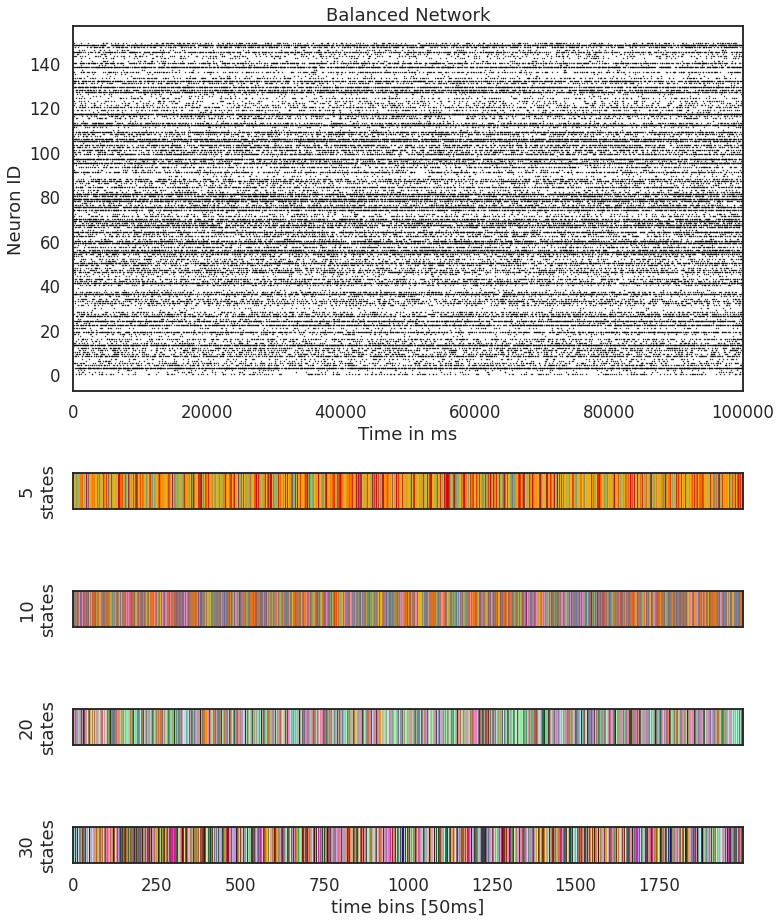

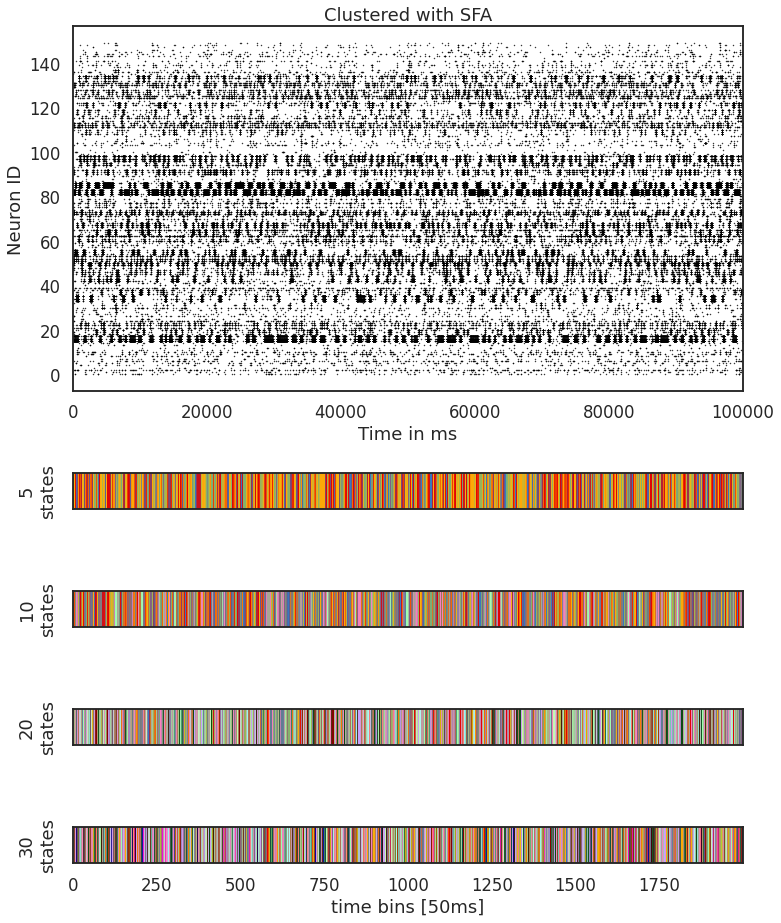

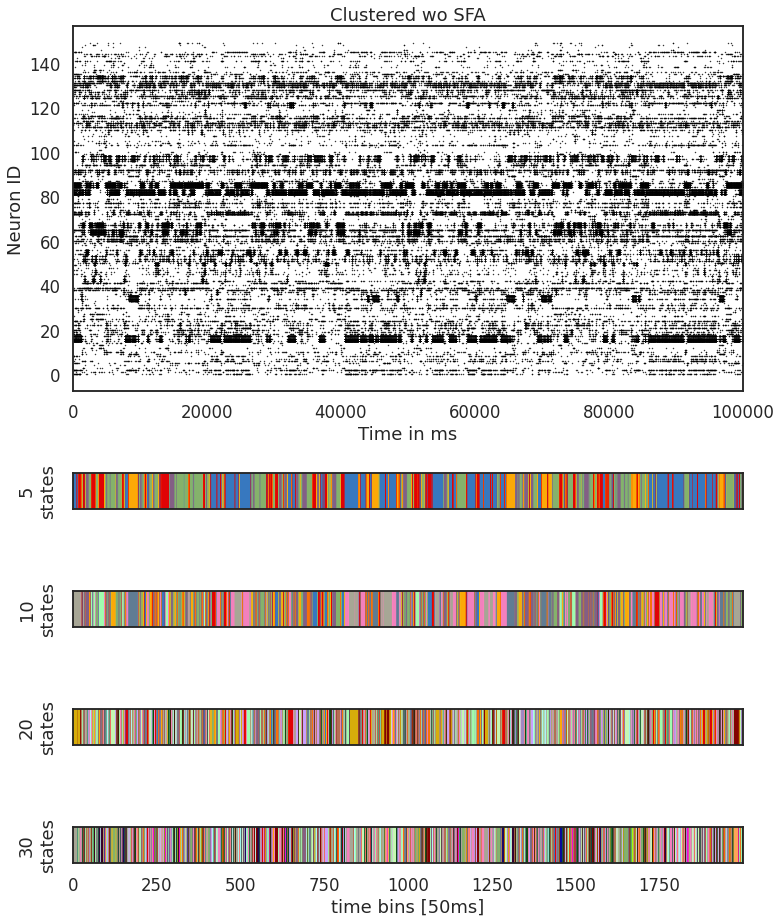

In [ ]:
model_states = []

N_iters = 50
num_states = [5, 10, 20, 30]    # number of discrete states
time_bins = intervals

height_ratios = [10] + [1]*len(num_states)

for model in range(len(models)):

  model_hmm_z = []
  
  obs_dim = int(data_array[model].shape[1])     # dimensionality of observation

  fig, axes = plt.subplots(len(num_states)+1,1,figsize=(12, 15),gridspec_kw={'height_ratios':height_ratios})

  #create subplot
  axes[0].plot(three_neurons_per_cluster[model][0], three_neurons_per_cluster[model][1],'.k',markersize = 0.8) 

  #label the plot
  axes[0].set_xlim([0, time_range])
  axes[0].set_xlabel('Time in ms')
  axes[0].set_ylabel('Neuron ID')
  axes[0].set_title(model_names[model])

  for state in range(len(num_states)):

    ##===== Create HMM object to fit =====## 
    hmm = ssm.HMM(num_states[state], obs_dim, observations="gaussian")

    #This beautiful line of code hides all the business of fitting Hidden Markov models to data under the hood.
    #Go look at the source code and marvel at how code should be written. 
    hmm_lls = hmm.fit(data_array[model], method="em", num_iters=N_iters, init_method="kmeans")
    #hmm_lls = hmm.fit(training_data, method="em", num_iters=N_iters)

    # Plot the true and inferred discrete states
    hmm_z = hmm.most_likely_states(data_array[model])

    model_hmm_z.append(hmm_z)

    axes[state + 1].imshow(hmm_z[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(color)-1)
    axes[state + 1].set_yticklabels([])
    axes[state + 1].set_ylabel(str(num_states[state]) + "\nstates")

    if state < len(num_states)-1:    
      axes[state + 1].set_xticklabels([])

  axes[len(num_states)].set_xlabel("time bins [50ms]")

  model_states.append(model_hmm_z)

  #arrange subplots 
  fig.subplots_adjust(top = 0.90, hspace = 0.8)




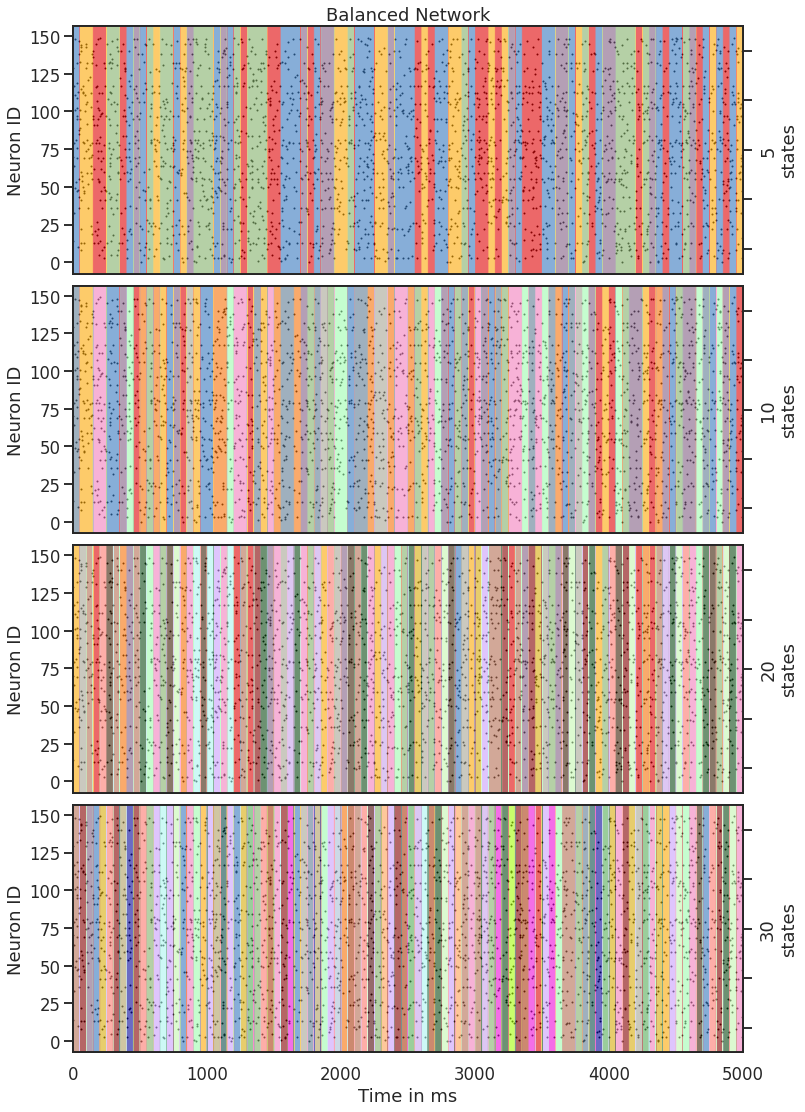

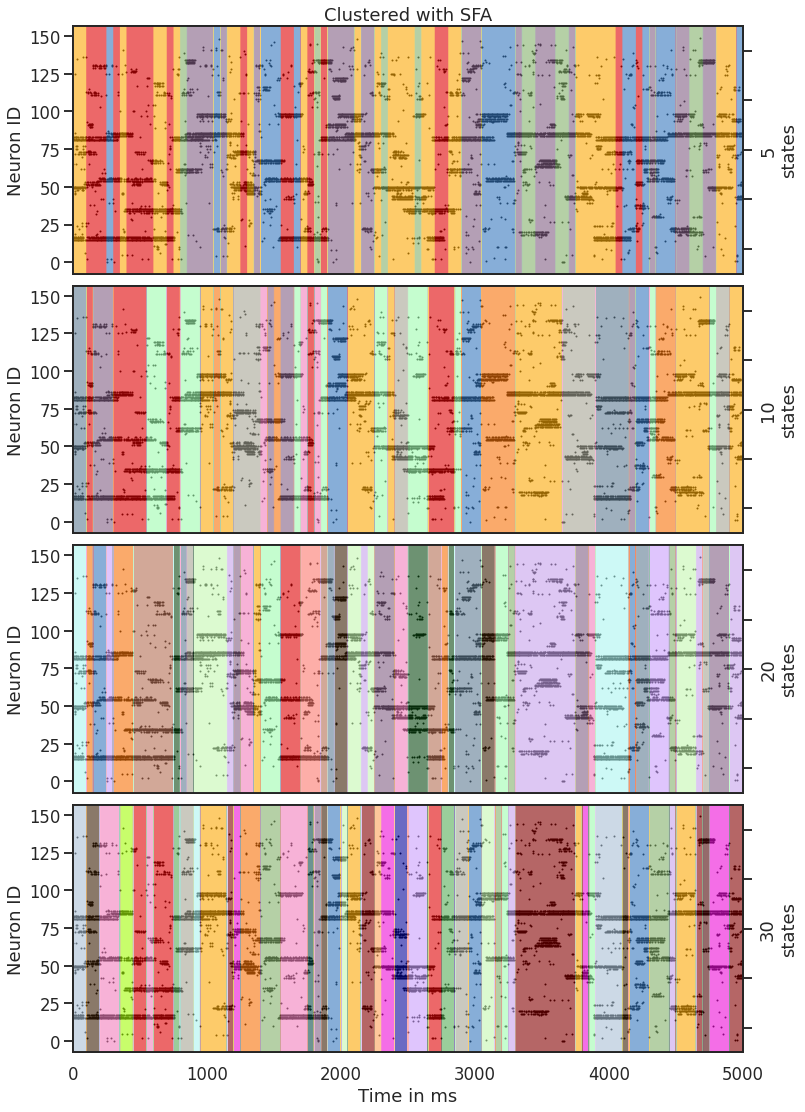

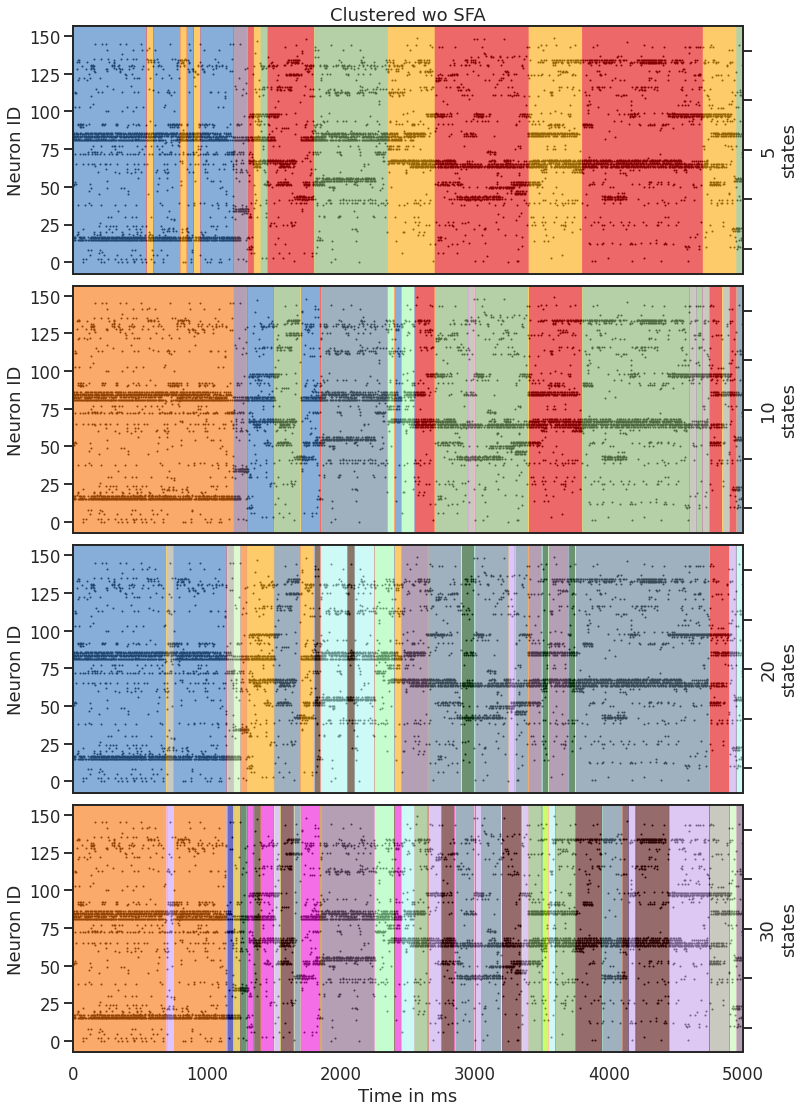

In [73]:
if time_range > 5000:

  time_range_to_plot = []

  time_range = 5000

  for model in range(len(models)):
    #set condition: returns True for time <= 5 s
    condition = [True if i <= time_range else False for i in three_neurons_per_cluster[model][0]]

    #extract new x and y values for array based on condition
    new_x = np.extract(condition, three_neurons_per_cluster[model][0])
    new_y = np.extract(condition, three_neurons_per_cluster[model][1])

    new = [new_x, new_y]

    time_range_to_plot.append(new)

    time_range = 5000

else:

    time_range_to_plot = three_neurons_per_cluster
    time_range = time_range


model_states = []

N_iters = 50
num_states = [5, 10, 20, 30]   # number of discrete states
time_bins = intervals

height_ratios = [10]*len(num_states)

for model in range(len(models)):

  model_hmm_z = []
  
  obs_dim = int(data_array[model].shape[1])     # dimensionality of observation

  fig, axes = plt.subplots(len(num_states),1,figsize=(12, 30),gridspec_kw={'height_ratios':height_ratios})

  #create subplot
  #axes[0].plot(three_neurons_per_cluster[model][0], three_neurons_per_cluster[model][1],'.k',markersize = 0.8) 

  #label the plot
  #axes[0].set_xlim([0, 5000])
  #axes[0].set_xlabel('Time in ms')
  #axes[0].set_ylabel('Neuron ID')
  #axes[0].set_title(model_names[model])

  for state in range(len(num_states)):

    if state == 0: 
      axes[state].set_title(model_names[model])

    ##===== Create HMM object to fit =====## 
    hmm = ssm.HMM(num_states[state], obs_dim, observations="gaussian")

    #This beautiful line of code hides all the business of fitting Hidden Markov models to data under the hood.
    #Go look at the source code and marvel at how code should be written. 
    hmm_lls = hmm.fit(data_array[model], method="em", num_iters=N_iters, init_method="kmeans")
    #hmm_lls = hmm.fit(training_data, method="em", num_iters=N_iters)

    # Plot the true and inferred discrete states
    hmm_z = hmm.most_likely_states(data_array[model])

    model_hmm_z.append(hmm_z)

    #create subplot
    axes[state].plot(time_range_to_plot[model][0], time_range_to_plot[model][1],'.k',markersize = 2) 

    #label the plot
    axes[state].set_xlim([0, time_range])
    axes[state].set_ylabel('Neuron ID')


    ax2 = axes[state].twinx()

    test = np.repeat(hmm_z[None,:],50)

    ax2.imshow(test[None,:time_range], aspect="auto", cmap=cmap, vmin=0, vmax=len(color)-1,alpha=0.6)
    ax2.set_yticklabels([])
    ax2.set_ylabel(str(num_states[state]) + "\nstates")
    ax2.grid(False,axis='y')
    ax2.autoscale(tight=True)

    if state < len(num_states)-1:    
      ax2.set_xticklabels([])
    
  axes[state].set_xlabel('Time in ms')

  model_states.append(model_hmm_z)

  #arrange subplots 
  fig.subplots_adjust(top = 0.6, hspace = 0.05)

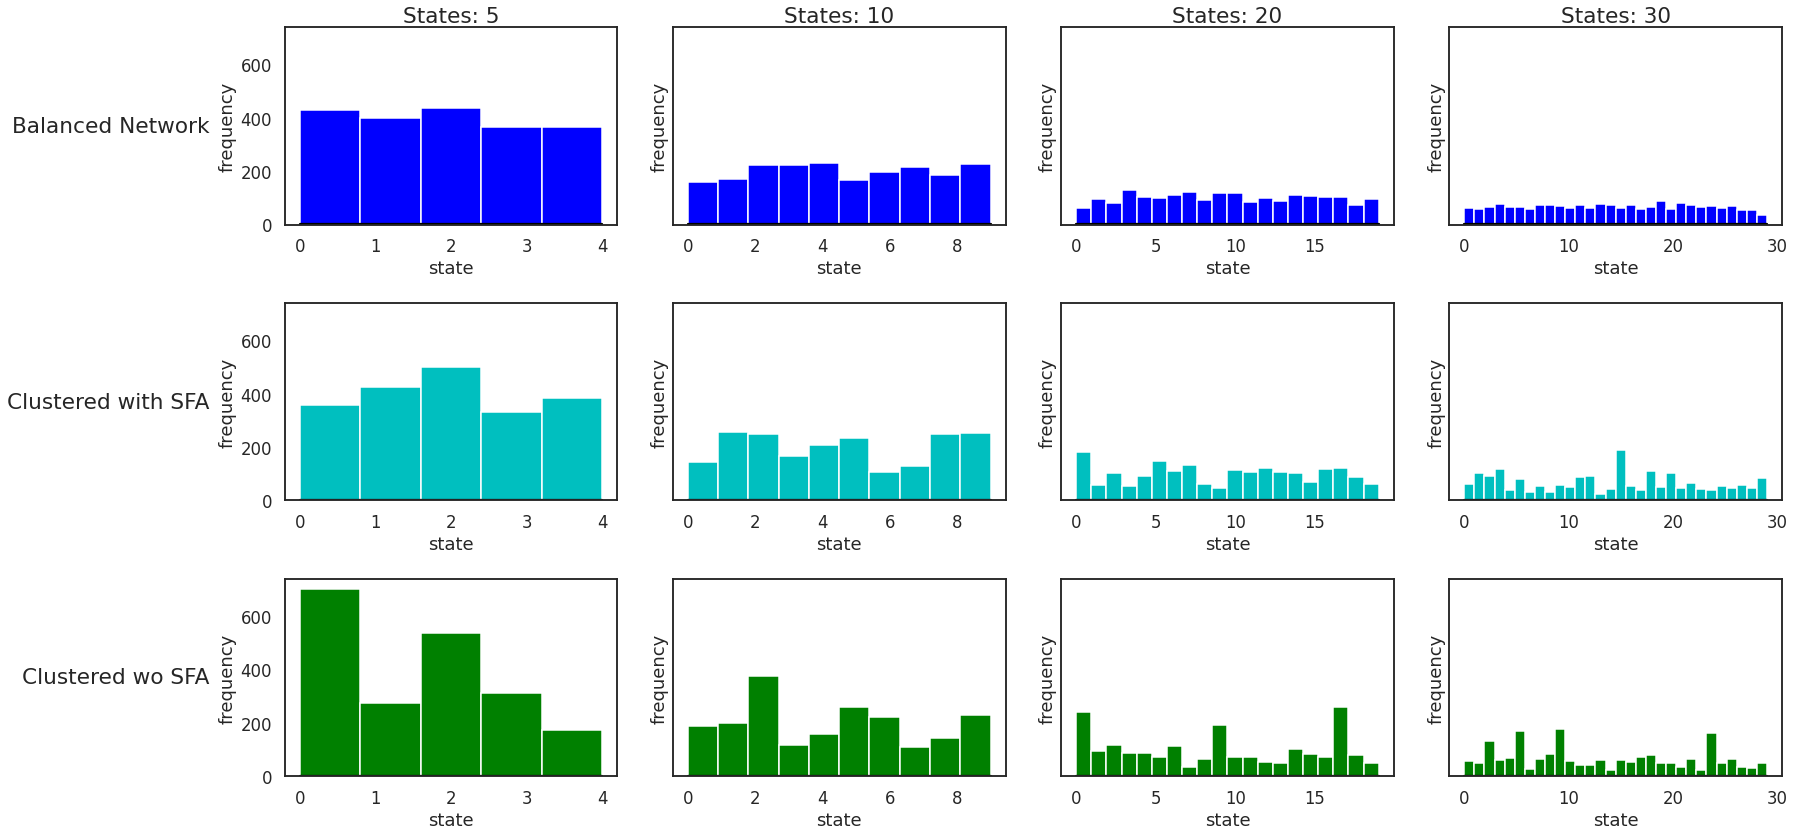

In [74]:
#initiate figure and axes with specific size, rows = number of models, columns = number of intervals
fig, axes = plt.subplots(figsize= (25, 12), nrows=len(models), ncols=len(num_states), sharey = True)

#define title for columns and rows (states and model names)
cols = ['States: {}'.format(col) for col in num_states]
rows = ['{}'.format(row) for row in model_names]

#define x and y axes of each subplot (neurons and spike count)
plt.setp(axes.flat, xlabel='state', ylabel='frequency')

#define pad (required for spacing between subplots and labels)
pad = 5 # in points

#label columns
for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')
    
#labels rows
for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

#arrange subplots 
fig.tight_layout()
# tight_layout doesn't take labels into account 
# more space needed:
fig.subplots_adjust(left = 0.15, top = 0.95)

#define colors for different models
colors = ['b', 'c', 'g']

#for every interval
for state in range(len(num_states)):
  #for every model
  for model in range(len(models)):
    #make subplots, intervals in columns, models in rows, different color for every model
    axes[model, state].hist(model_states[model][state], num_states[state], color = colors[model])

    #plot the threshold line
    axes[model, state].plot(range(num_states[state]), [1]*num_states[state], color = "k")

#show the figure
plt.show()

In [75]:
all_states = []

for state in range(num_states[1]):

  current_duration = 0

  list_states = []

  for current_state in range(len(model_states[2][1])):

      if state == model_states[2][1][current_state]:

        current_duration = current_duration + 1

        if current_state == len(model_states[2][1])-1: 

          list_states.append(1)

      elif current_duration != 0:

        list_states.append(current_duration)

        current_duration = 0
      
      else: 

        current_duration = 0

  array_states = np.array(list_states)
    
  all_states.append(array_states)

In [76]:
model_durations = []

for model in range(len(models)):

  nstate_list = []

  for nstates in range(len(num_states)):

    all_states = []

    for state in range(num_states[nstates]):

      current_duration = 0

      list_states = []

      for current_state in range(len(model_states[model][nstates])):

          if state == model_states[model][nstates][current_state]:

            current_duration = current_duration + 1

            if current_state == len(model_states[model][nstates])-1: 

              list_states.append(1)

          elif current_duration != 0:

            list_states.append(current_duration)

            current_duration = 0
          
          else: 

            current_duration = 0

      array_states = np.array(list_states)
        
      all_states.append(array_states)
    
    nstate_list.append(all_states)
  
  model_durations.append(nstate_list)

In [77]:
model_duration_statistics = []

for model in range(len(models)):

  current_model_duration = []

  for nstate in range(len(num_states)):

    nstate_statistics = []

    for state in range(num_states[nstate]):

      mean = np.mean(model_durations[model][nstate][state])
      std = np.std(model_durations[model][nstate][state])

      nstate_statistics.append((mean, std))

    current_model_duration.append(nstate_statistics)
  
  model_duration_statistics.append(current_model_duration)

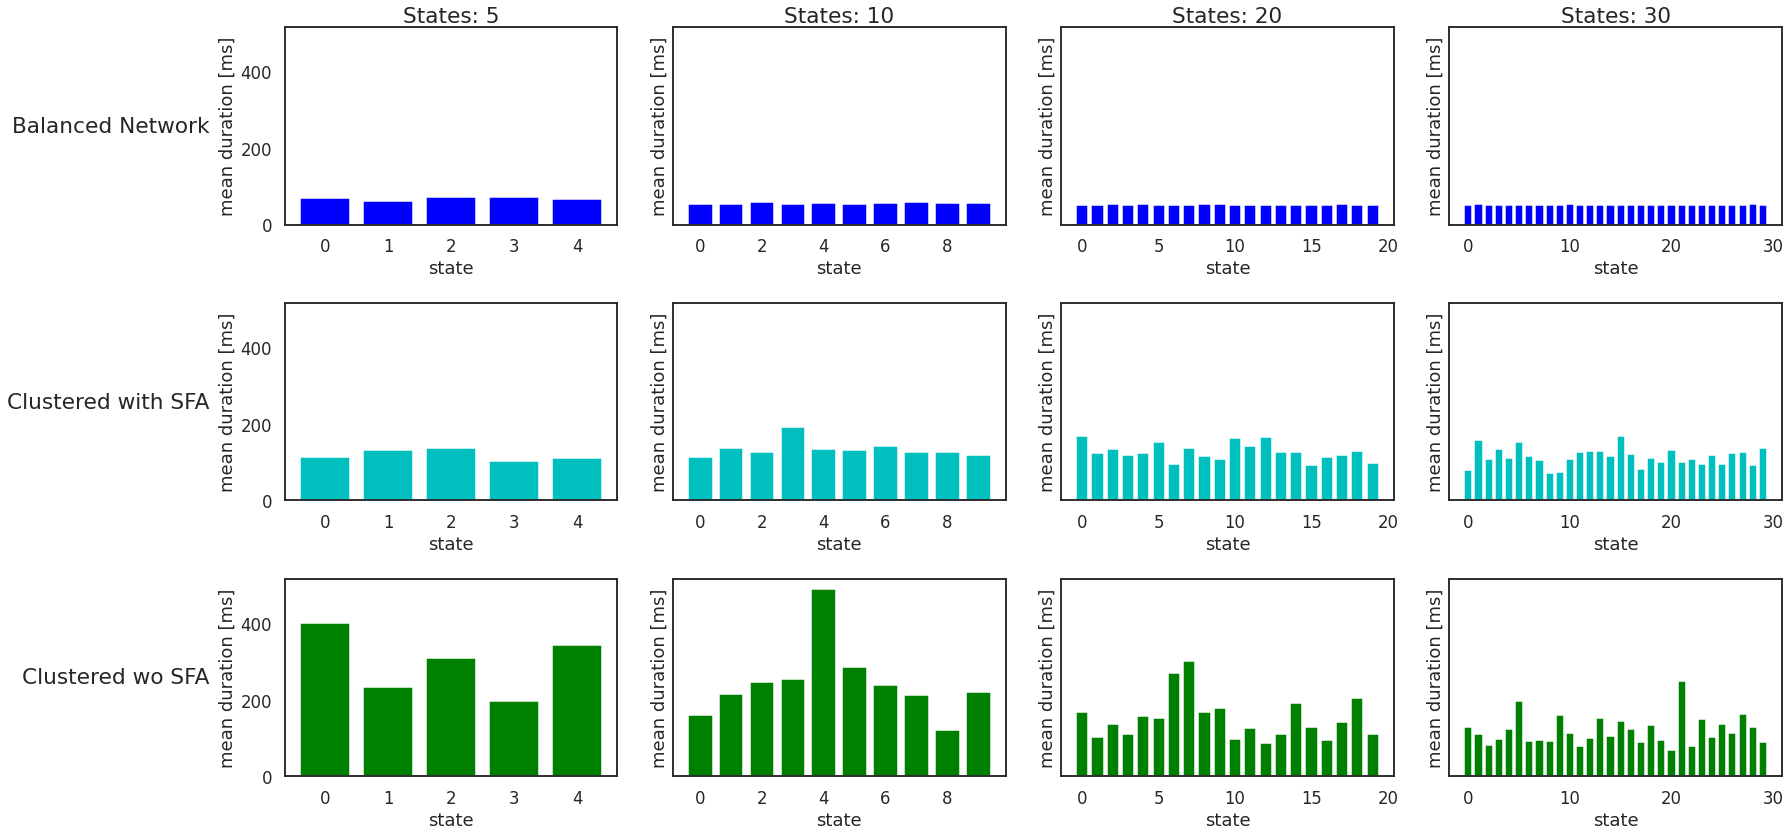

In [78]:
from operator import add
from operator import sub
import statistics

mean_durations = []
std_durations = []

#initiate figure and axes with specific size, rows = number of models, columns = number of intervals
fig, axes = plt.subplots(figsize= (25, 12), nrows=len(models), ncols=len(num_states), sharey = True)

#define title for columns and rows (states and model names)
cols = ['States: {}'.format(col) for col in num_states]
rows = ['{}'.format(row) for row in model_names]

#define x and y axes of each subplot (neurons and spike count)
plt.setp(axes.flat, xlabel='state', ylabel='mean duration [ms]')

#define pad (required for spacing between subplots and labels)
pad = 5 # in points

#label columns
for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')
    
#labels rows
for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

#arrange subplots 
fig.tight_layout()
# tight_layout doesn't take labels into account 
# more space needed:
fig.subplots_adjust(left = 0.15, top = 0.95)

#define colors for different models
colors = ['b', 'c', 'g']

t_test_data = []

#for every model
for model in range(len(models)):

  model_mean = []
  model_std = []

  model_t_test_data = []

  #for every state
  for state in range(len(num_states)):

    #get lists of all means and standard deviations
    all_means = [x[0]*50 for x in model_duration_statistics[model][state]]
    all_std = [x[1]*50 for x in model_duration_statistics[model][state]]

    model_t_test_data.append(all_means)

    mean = np.mean(all_means)
    std = np.std(all_means)

    #state * model --> 12 values
    model_mean.append(mean)
    #state * model --> 12 values
    model_std.append(std)

    #calculate positive and negative error
    pos_err = list(map(add, all_means, all_std)) 
    neg_err = list(map(sub, all_means, all_std))

    #make subplots, intervals in columns, models in rows, different color for every model
    axes[model, state].bar(range(num_states[state]), all_means, color = colors[model])

  mean_duration = statistics.mean(model_mean)
  std_duration = statistics.stdev(model_std)

  mean_durations.append(mean_duration)
  std_durations.append(std_duration)

  t_test_data.append(model_t_test_data)

#show the figure
plt.show()

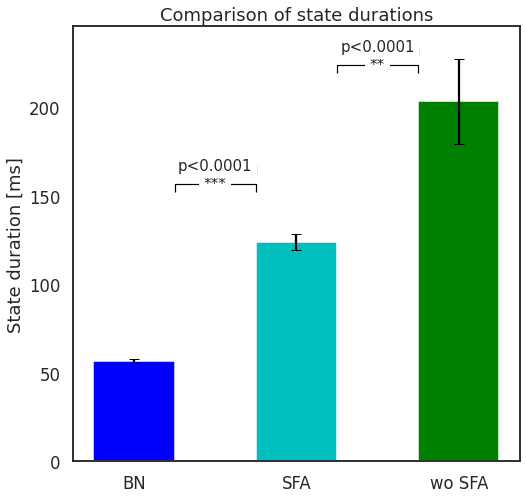

In [79]:
model_abbreviations = ["BN", "SFA", "wo SFA"]

from matplotlib.markers import TICKDOWN
from scipy import stats

def significance_bar(start,end,height,displaystring,linewidth = 1.2,markersize = 8,boxpad  =0.3,fontsize = 15,color = 'k'):
    # draw a line with downticks at the ends
    plt.plot([start,end],[height]*2,'-',color = color,lw=linewidth,marker = TICKDOWN,markeredgewidth=linewidth,markersize = markersize)
    # draw the text with a bounding box covering up the line
    plt.text(0.5*(start+end),height,displaystring,ha = 'center',va='center',bbox=dict(facecolor='1.', edgecolor='none',boxstyle='Square,pad='+str(boxpad)),size = fontsize)

fig= plt.figure(figsize=(8,8))

plt.bar(range(len(model_abbreviations)), mean_durations, width = 0.5, align='center', color = colors, yerr = std_durations, capsize = 5)
plt.xticks(range(len(model_abbreviations)), model_abbreviations)
plt.ylabel('State duration [ms]')
plt.title('Comparison of state durations')

model_td = []
for model in range(len(models)):
  td = []
  for states in range(len(t_test_data[model])): 
    td = td + t_test_data[model][states]
  model_td.append(td)

t_values = []
for model in range(len(models)-1):
  t_value = stats.ttest_ind(model_td[model], model_td[model+1], equal_var=True)[1]
  t_values.append(t_value)

bar_width = 0.5
offset  = 100

for i,p in enumerate(t_values):
    if p>=0.05:
        displaystring = r'n.s.'
        p_string = 'p>=0.05'
    elif p<0.0001:
        displaystring = r'***'
        p_string = 'p<0.0001'
    elif p<0.001:
        displaystring = r'**'
    else:
        displaystring = r'*'
        p_string = 'p<0.001'

    height = offset +  mean_durations[i]
    bar_centers = range(len(model_abbreviations))[i] + np.array([0.5,1.5])*bar_width
    significance_bar(bar_centers[0],bar_centers[1],height,displaystring)
    significance_bar(bar_centers[0],bar_centers[1],height+10,p_string)

(array([ 6., 10.,  7.,  6.,  1.,  8.,  1.,  2.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

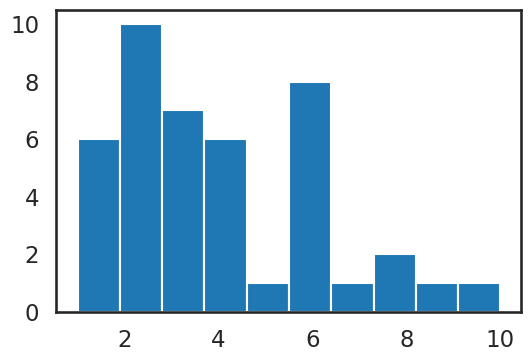

In [80]:
figure = plt.figure(dpi=100)

plt.hist(model_durations[1][1][3])

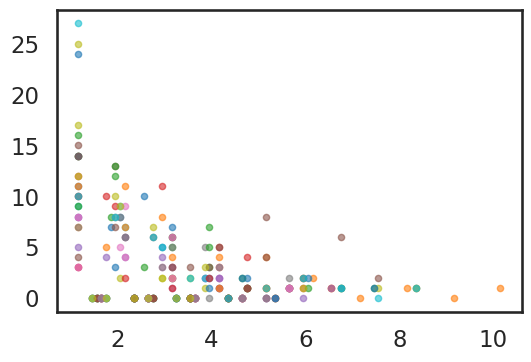

In [81]:


figure = plt.figure(dpi=100)

for i in range(30):
  #test = plt.hist(model_durations[1][2][i], histtype= "step")
  hist = np.histogram(model_durations[1][3][i])

  plt.plot(hist[1][:10] + [0.15]*10, hist[0], ".", alpha = 0.6)
  #plt.plot(test[0], ".")



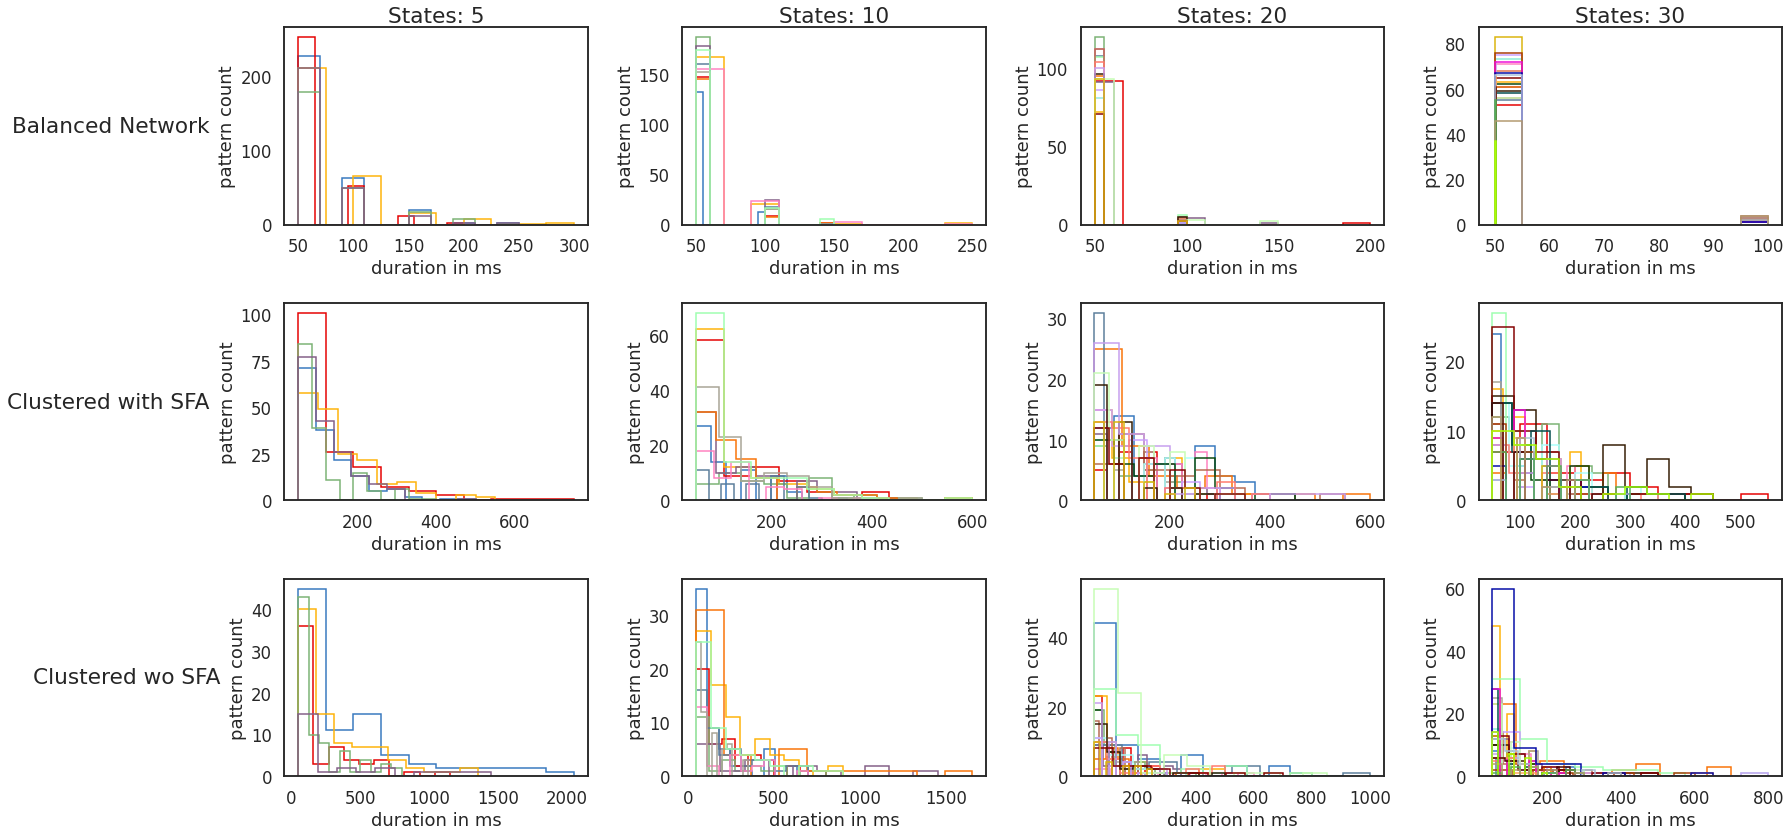

In [82]:
#initiate figure and axes with specific size, rows = number of models, columns = number of intervals
fig, axes = plt.subplots(figsize= (25, 12), nrows=len(models), ncols=len(num_states), sharey = False)

#define title for columns and rows (states and model names)
cols = ['States: {}'.format(col) for col in num_states]
rows = ['{}'.format(row) for row in model_names]

#define x and y axes of each subplot (neurons and spike count)
plt.setp(axes.flat, xlabel='duration in ms', ylabel='pattern count')

#define pad (required for spacing between subplots and labels)
pad = 5 # in points

#label columns
for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')
    
#labels rows
for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

#arrange subplots 
fig.tight_layout()
# tight_layout doesn't take labels into account 
# more space needed:
fig.subplots_adjust(left = 0.15, top = 0.95)

#define colors for different models
colors = ['b', 'c', 'g']

#for every interval
for state in range(len(num_states)):
  #for every model
  for model in range(len(models)):

    #histos_x = []
    #histos_y = []

    for states in range(len(model_durations[model][state])):

      #hist = np.histogram(model_durations[model][state][states])

      #plot the threshold line
      #axes[model, state].plot(hist[1][:10] + [0.15]*10, hist[0], ".", alpha = 0.6)

      hist = axes[model, state].hist(model_durations[model][state][states]*50, histtype= "step", color = color[states]) #alpha = 0.95

      #histos_y.append(hist[0])
      #histos_x.append(hist[1][:10] + [0.15]*10)

    #x = np.array(histos_x)
    #x = x.flatten(order='C')

    #y = np.array(histos_y)
    #y = y.flatten(order='C')

    #z = np.polyfit(x, y, 2)

    #p = np.poly1d(z)

    #axes[model, state].plot(x, p(x), '-')

#show the figure
plt.show()